In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import matplotlib.image as mpimg

In [2]:
path = r'C:\Users\Ananya\PycharmProjects\pythonProject\cancerdataset\Skin cancer ISIC The International Skin Imaging Collaboration\Train'
classes = os.listdir(path)
classes

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

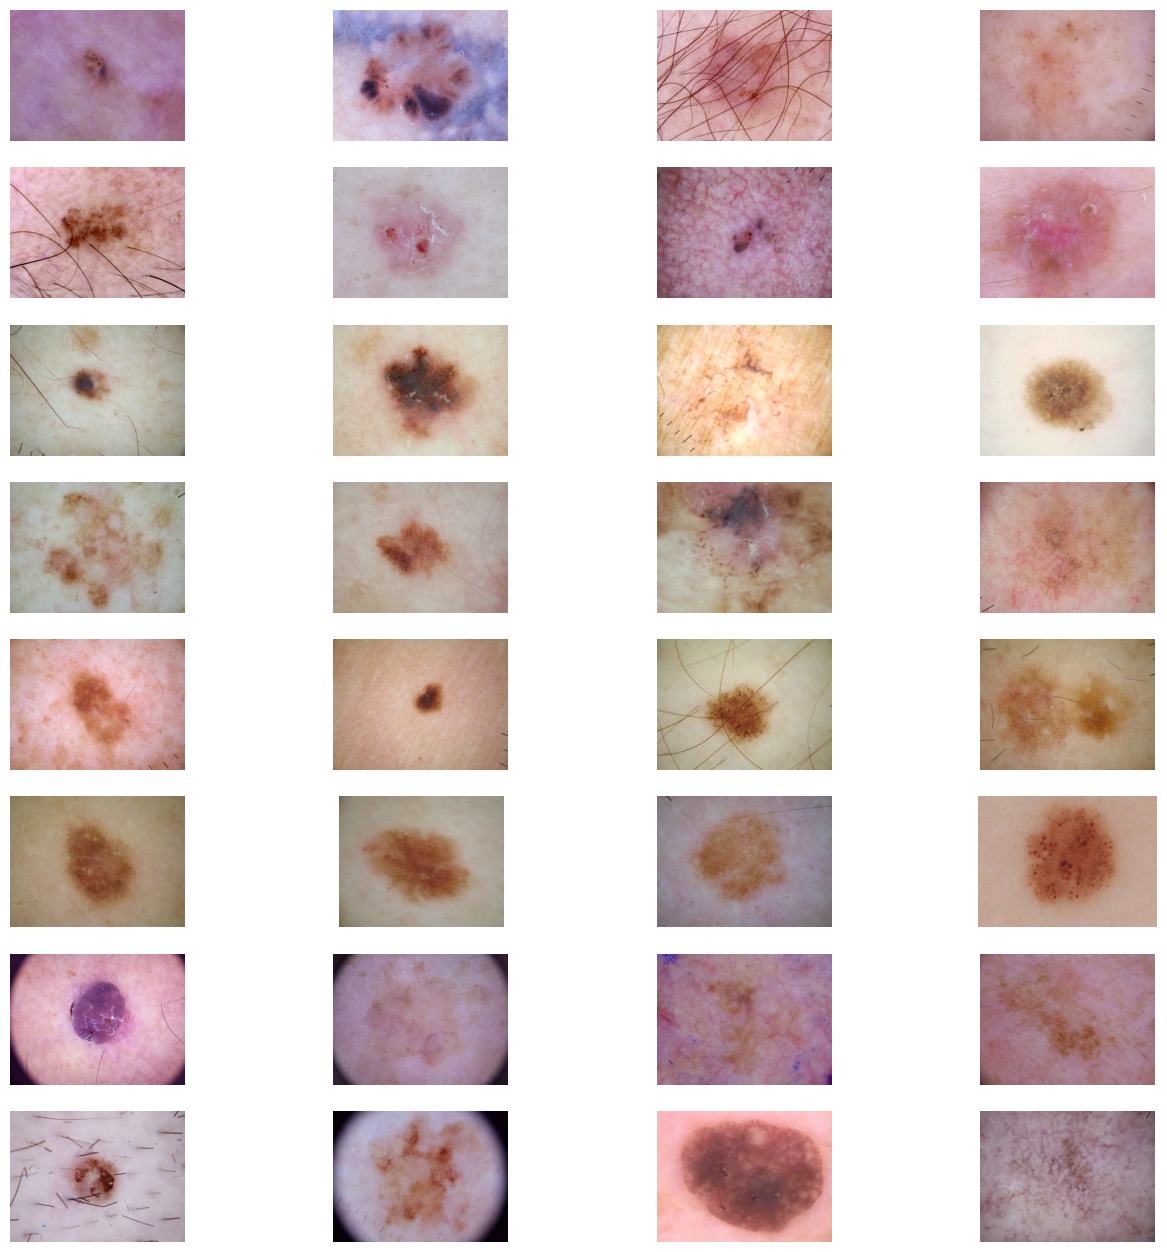

In [3]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

actinic_dir = os.path.join(r'C:\Users\Ananya\PycharmProjects\pythonProject\cancerdataset\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis')
basal_dir = os.path.join(r'C:\Users\Ananya\PycharmProjects\pythonProject\cancerdataset\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma')
dermatofibroma_dir = os.path.join(r'C:\Users\Ananya\PycharmProjects\pythonProject\cancerdataset\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma')
melanoma_dir = os.path.join(r'C:\Users\Ananya\PycharmProjects\pythonProject\cancerdataset\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma')
nevus_dir = os.path.join(r'C:\Users\Ananya\PycharmProjects\pythonProject\cancerdataset\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus')
pigmented_dir = os.path.join(r'C:\Users\Ananya\PycharmProjects\pythonProject\cancerdataset\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis')
seborrheic_dir = os.path.join(r'C:\Users\Ananya\PycharmProjects\pythonProject\cancerdataset\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis')
squamous_dir = os.path.join(r'C:\Users\Ananya\PycharmProjects\pythonProject\cancerdataset\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma')
vascular_dir = os.path.join(r'C:\Users\Ananya\PycharmProjects\pythonProject\cancerdataset\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion')

actinic_names = os.listdir(actinic_dir)
basal_names = os.listdir(basal_dir)
dermatofibroma_names = os.listdir(dermatofibroma_dir)
melanoma_names = os.listdir(melanoma_dir)
nevus_names = os.listdir(nevus_dir)
pigmented_names = os.listdir(pigmented_dir)
seborrheic_names = os.listdir(seborrheic_dir)
squamous_names = os.listdir(squamous_dir)
vascular_names = os.listdir(vascular_dir)

pic_index = 210

actinic_images = [os.path.join(actinic_dir, fname)
              for fname in actinic_names[pic_index-8:pic_index]]
basal_images = [os.path.join(basal_dir, fname)
              for fname in basal_names[pic_index-8:pic_index]]
dermatofibroma_images = [os.path.join(dermatofibroma_dir, fname)
              for fname in dermatofibroma_names[pic_index-8:pic_index]]
melanoma_images = [os.path.join(melanoma_dir, fname)
              for fname in melanoma_names[pic_index-8:pic_index]]
nevus_images = [os.path.join(nevus_dir, fname)
              for fname in nevus_names[pic_index-8:pic_index]]
pigmented_images = [os.path.join(pigmented_dir, fname)
              for fname in pigmented_names[pic_index-8:pic_index]]
seborrheic_images = [os.path.join(seborrheic_dir, fname)
              for fname in seborrheic_names[pic_index-8:pic_index]]
squamous_images = [os.path.join(squamous_dir, fname)
              for fname in squamous_names[pic_index-8:pic_index]]
vascular_images = [os.path.join(vascular_dir, fname)
              for fname in vascular_names[pic_index-8:pic_index]]

for i, img_path in enumerate(actinic_images + basal_images +dermatofibroma_images + melanoma_images + nevus_images + pigmented_images + seborrheic_images + squamous_images + vascular_images ):
    sp = plt.subplot(8, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [4]:
base_dir = r'C:\Users\Ananya\PycharmProjects\pythonProject\cancerdataset\Skin cancer ISIC The International Skin Imaging Collaboration\Train'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 2239 files belonging to 9 classes.
Using 2016 files for training.
Found 2239 files belonging to 9 classes.
Using 223 files for validation.


In [5]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [7]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
model.save('model.h5')

In [9]:
history = model.fit(train_datagen,
          epochs=20,
          validation_data=test_datagen)

Epoch 1/20
63/63 [==============================] - 19s 129ms/step - loss: -2.4540 - accuracy: 0.0888 - val_loss: -57.2006 - val_accuracy: 0.1614
Epoch 2/20
63/63 [==============================] - 7s 105ms/step - loss: -18.3216 - accuracy: 0.1017 - val_loss: -34.0987 - val_accuracy: 0.0807
Epoch 3/20
63/63 [==============================] - 7s 96ms/step - loss: -71.3110 - accuracy: 0.1161 - val_loss: -427.5394 - val_accuracy: 0.1614
Epoch 4/20
63/63 [==============================] - 7s 103ms/step - loss: -165.6741 - accuracy: 0.1121 - val_loss: -599.6299 - val_accuracy: 0.0762
Epoch 5/20
63/63 [==============================] - 7s 95ms/step - loss: -303.7540 - accuracy: 0.1359 - val_loss: -2378.9192 - val_accuracy: 0.1614
Epoch 6/20
63/63 [==============================] - 7s 96ms/step - loss: -419.1754 - accuracy: 0.1295 - val_loss: -4314.4326 - val_accuracy: 0.1614
Epoch 7/20
63/63 [==============================] - 7s 94ms/step - loss: -624.3129 - accuracy: 0.1582 - val_loss: -284

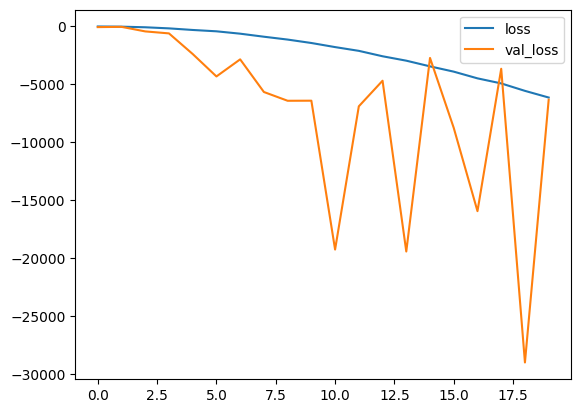

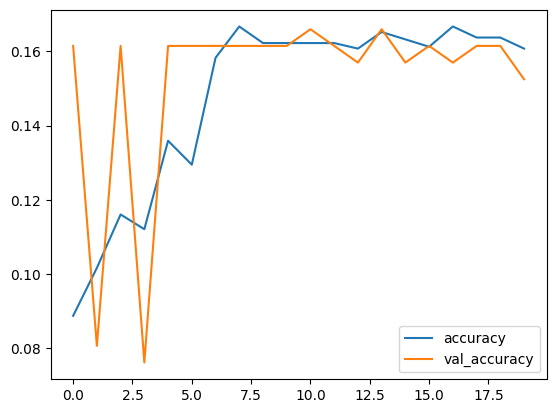

In [10]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [11]:
def get_hospitals_in_district(district):
    hospitals = {
        "Chennai": [
            "Adyar Cancer Institute, Chennai",
            "Cancer Institute (WIA), Chennai",
            "MIOT International Hospital, Chennai",
            "Apollo Cancer Centre, Chennai",
            "SIMS Hospital, Chennai"
        ],
        "Coimbatore": [
            "G. Kuppuswamy Naidu Memorial Hospital, Coimbatore",
            "Kovai Medical Center and Hospital (KMCH), Coimbatore",
            "PSG Hospitals, Coimbatore",
            "Gem Hospital and Research Centre, Coimbatore",
            "Sri Ramakrishna Hospital, Coimbatore"
        ],
        "Madurai": [
            "Apollo Speciality Hospitals, Madurai",
            "Meenakshi Mission Hospital, Madurai",
            "Vadamalayan Hospitals, Madurai",
            "Velammal Medical College Hospital and Research Institute, Madurai",
            "Government Rajaji Hospital, Madurai"
        ],
        "Salem": [
            "Vinayaka Mission's Kirupananda Variyar Medical College and Hospitals, Salem",
            "Kavery Medical Centre and Hospital, Salem",
            "Ashwin Hospital, Salem",
            "Arun Hospital, Salem",
            "Kovai Medical Center and Hospital (KMCH), Salem"
        ],
        "Tiruchirappalli": [
            "Kauvery Hospital, Tiruchirappalli",
            "Cethar Hospitals, Tiruchirappalli",
            "GVN Hospital, Tiruchirappalli",
            "City Hospital, Tiruchirappalli",
            "KMC Speciality Hospital, Tiruchirappalli"
        ],
        "Tirunelveli": [
            "Tirunelveli Medical College Hospital, Tirunelveli",
            "Nirmal Hospital, Tirunelveli",
            "Bharath Hospital, Tirunelveli",
            "CSI Hospital, Tirunelveli",
            "Aarthi Hospitals, Tirunelveli"
        ],
        "Erode": [
            "Sudha Hospitals, Erode",
            "Nethaji Hospitals, Erode",
            "Pavithra Hospitals, Erode",
            "Sree Abirami Hospitals, Erode",
            "R.K. Hospital, Erode"
        ],
        "Vellore": [
            "Christian Medical College (CMC), Vellore",
            "Aarupadai Veedu Medical College Hospital, Vellore",
            "Sri Narayani Hospital & Research Centre, Vellore",
            "Sri Devi Hospital, Vellore",
            "Fortis Malar Hospital, Vellore"
        ],
        "Thoothukudi": [
            "V.O.C. Memorial Hospital, Thoothukudi",
            "Thangam Hospital, Thoothukudi",
            "Sri Venkateshwara Hospital, Thoothukudi",
            "Dr. Muthulakshmi Hospital, Thoothukudi",
            "Amala Cancer Hospital, Thoothukudi"
        ],
        "Tiruppur": [
            "Dr. Sakthivel Eye and Child Care Centre, Tiruppur",
            "Raju Hospital, Tiruppur",
            "Mahalakshmi Hospital, Tiruppur",
            "Varshini Hospital, Tiruppur",
            "Balaji Hospital, Tiruppur"
        ],
        "Krishnagiri": [
            "Bharath Hospital, Krishnagiri",
            "City Hospital, Krishnagiri",
            "Kovai Medical Center and Hospital (KMCH), Krishnagiri",
            "Sri Ramakrishna Hospital, Krishnagiri",
            "GVN Hospital, Krishnagiri"
        ],
        "Kanniyakumari": [
            "KIMS Hospital, Kanniyakumari",
            "Ramakrishna Hospital, Kanniyakumari",
            "Government Medical College Hospital, Kanniyakumari",
            "Sree Mookambika Institute of Medical Sciences, Kanniyakumari",
            "Apollo Hospital, Kanniyakumari"
        ],
        "Ariyalur": [
            "Government General Hospital, Ariyalur",
            "Arasu Hospital, Ariyalur",
            "Sree Renga Hospital, Ariyalur",
            "Kamala Hospital, Ariyalur",
            "Sri Venkateshwara Hospital, Ariyalur"
        ],
        "Cuddalore": [
            "Cuddalore Medical College Hospital, Cuddalore",
            "Sree Venkateswara Hospital, Cuddalore",
            "Krishna Hospital, Cuddalore",
            "Sai Hospital, Cuddalore",
            "Vasantha Memorial Hospital, Cuddalore"
        ],
        "Dharmapuri": [
            "Government Dharmapuri Medical College and Hospital, Dharmapuri",
            "Bharath Hospital, Dharmapuri",
            "Sri Raja Rajeswari Hospital, Dharmapuri",
            "Kamalakshi Hospital, Dharmapuri",
            "Lakshmi Hospital, Dharmapuri"
        ],
        "Dindigul": [
            "Government Dindigul Medical College Hospital, Dindigul",
            "Aravind Hospital, Dindigul",
            "Sree Saraswathi Hospital, Dindigul",
            "Bharath Hospital, Dindigul",
            "Krishna Hospital, Dindigul"
        ],
        "Kanchipuram": [
            "Government Hospital, Kanchipuram",
            "Hindu Mission Hospital, Kanchipuram",
            "Dr. Rela Institute & Medical Centre, Kanchipuram",
            "Sri Ramachandra Medical Centre (SRMC), Kanchipuram",
            "Kailash Hospital, Kanchipuram"
        ],
        "Karur": [
            "Government Karur Medical College Hospital, Karur",
            "Velan Hospitals, Karur",
            "Bharath Hospital, Karur",
            "Sri Chakra Hospitals, Karur",
            "Kovai Medical Center and Hospital (KMCH), Karur"
        ],
        "Nagapattinam": [
            "Government Nagapattinam Medical College Hospital, Nagapattinam",
            "Kamala Hospital, Nagapattinam",
            "Sree Renga Hospital, Nagapattinam",
            "Jeyasekharan Hospital & Nursing Home, Nagapattinam",
            "Arasu Hospital, Nagapattinam"
        ],
        "Namakkal": [
            "Government Namakkal Medical College Hospital, Namakkal",
            "Cauvery Hospital, Namakkal",
            "Lakshmi Hospital, Namakkal",
            "Rajasree Hospital, Namakkal",
            "Rathna Hospital, Namakkal"
        ],
        "Perambalur": [
            "Government General Hospital, Perambalur",
            "Cauvery Hospital, Perambalur",
            "Jayam Hospital, Perambalur",
            "Sri Chandra Sekara Hospital, Perambalur",
            "Sri Vinayaka Hospital, Perambalur"
        ],
        "Pudukkottai": [
            "Government Pudukkottai Medical College Hospital, Pudukkottai",
            "Ramakrishna Hospital, Pudukkottai",
            "Sree Renga Hospital, Pudukkottai",
            "Bharath Hospital, Pudukkottai",
            "Sri Jayavignesh Hospital, Pudukkottai"
        ],
        "Ramanathapuram": [
            "Government Ramanathapuram Medical College Hospital, Ramanathapuram",
            "Aravind Hospital, Ramanathapuram",
            "Sree Saraswathi Hospital, Ramanathapuram",
            "Bharath Hospital, Ramanathapuram",
            "Krishna Hospital, Ramanathapuram"
        ],
        "Ranipet": [
            "Arun Hospital, Ranipet",
            "CMC Vellore - Chittoor Campus, Ranipet",
            "Vijaya Hospital, Ranipet",
            "Bharath Hospital, Ranipet",
            "Sri Venkateshwara Hospital, Ranipet"
        ],
        "Sivagangai": [
            "Government General Hospital, Sivagangai",
            "Arun Hospital, Sivagangai",
            "Sree Saraswathi Hospital, Sivagangai",
            "Bharath Hospital, Sivagangai",
            "Krishna Hospital, Sivagangai"
        ],
        "Tenkasi": [
            "Government Tenkasi Medical College Hospital, Tenkasi",
            "Vasantha Memorial Hospital, Tenkasi",
            "Kamala Hospital, Tenkasi",
            "Arasu Hospital, Tenkasi",
            "Sri Venkateshwara Hospital, Tenkasi"
        ],
        "Thanjavur": [
            "Government Thanjavur Medical College Hospital, Thanjavur",
            "GVN Hospital, Thanjavur",
            "Kamala Hospital, Thanjavur",
            "Sree Renga Hospital, Thanjavur",
            "Sri Venkateshwara Hospital, Thanjavur"
        ],
        "Theni": [
            "Government Theni Medical College Hospital, Theni",
            "Kovai Medical Center and Hospital (KMCH), Theni",
            "Arun Hospital, Theni",
            "Sree Saraswathi Hospital, Theni",
            "Bharath Hospital, Theni"
        ],
        "Tiruvallur": [
            "Government General Hospital, Tiruvallur",
            "Meenakshi Medical College Hospital, Tiruvallur",
            "Sree Renga Hospital, Tiruvallur",
            "Kamala Hospital, Tiruvallur",
            "Sri Venkateshwara Hospital, Tiruvallur"
        ],
        "Tirupathur": [
            "Government Tirupathur Medical College Hospital, Tirupathur",
            "Sree Saraswathi Hospital, Tirupathur",
            "Arasu Hospital, Tirupathur",
            "Bharath Hospital, Tirupathur",
            "Krishna Hospital, Tirupathur"
        ],
        "Tiruvannamalai": [
            "Government Tiruvannamalai Medical College Hospital, Tiruvannamalai",
            "Arun Hospital, Tiruvannamalai",
            "Sree Saraswathi Hospital, Tiruvannamalai",
            "Bharath Hospital, Tiruvannamalai",
            "Krishna Hospital, Tiruvannamalai"
        ],
        "Tiruvarur": [
            "Government Tiruvarur Medical College Hospital, Tiruvarur",
            "Arun Hospital, Tiruvarur",
            "Sree Saraswathi Hospital, Tiruvarur",
            "Bharath Hospital, Tiruvarur",
            "Krishna Hospital, Tiruvarur"
        ],
        "Tuticorin": [
            "Government General Hospital, Tuticorin",
            "Arun Hospital, Tuticorin",
            "Sree Saraswathi Hospital, Tuticorin",
            "Bharath Hospital, Tuticorin",
            "Krishna Hospital, Tuticorin"
        ],
        "Viluppuram": [
            "Government General Hospital, Viluppuram",
            "Arun Hospital, Viluppuram",
            "Sree Saraswathi Hospital, Viluppuram",
            "Bharath Hospital, Viluppuram",
            "Krishna Hospital, Viluppuram"
        ],
        "Virudhunagar": [
            "Government General Hospital, Virudhunagar",
            "Arun Hospital, Virudhunagar",
            "Sree Saraswathi Hospital, Virudhunagar",
            "Bharath Hospital, Virudhunagar",
            "Krishna Hospital, Virudhunagar"
        ]
        # Add hospitals for the remaining districts similarly
    }

    return hospitals.get(district, "No hospitals found for this district")
    result_label.config(text="\n".join(hospitals_in_selected_district))



1/1 [==============================] - 0s 40ms/step
No not a cancer


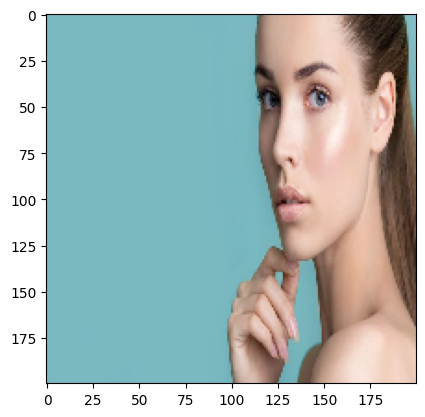

In [13]:
test_image = tf.keras.utils.load_img(r'C:\Users\Ananya\PycharmProjects\pythonProject\cancerdataset\Skin cancer ISIC The International Skin Imaging Collaboration\Test\actinic keratosis\clear-skin.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

i=0
if(result>=2):
  print("Yes a cancer")
else:
  print("No not a cancer")

1/1 [==============================] - 0s 24ms/step
Yes a cancer
1/1 [==============================] - 0s 26ms/step
Predicted cancer stage: Actinic keratosis


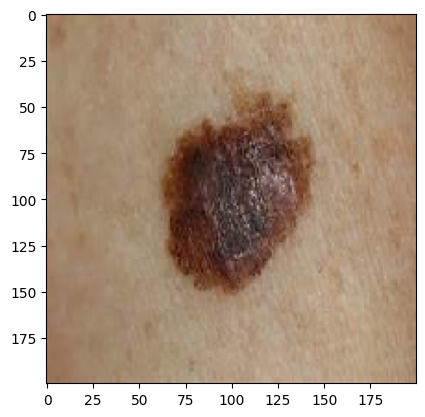

In [14]:
test_image = tf.keras.utils.load_img(r'C:\Users\Ananya\Pictures\Screenshots\2.jpeg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

i=0
if(result>=0.5):
  print("Yes a cancer")
  probabilities = model.predict(test_image)
  predicted_class_index = tf.argmax(probabilities, axis=1).numpy()[0]

# Define a dictionary to map class indices to cancer stages
  cancer_stages = {
    0: 'Actinic keratosis',
    1: 'Basal cell carcinoma',
    2: 'Dermatofibroma',
    3: 'Melanoma',
    4: 'Nevus',
    5: 'Pigmented benign keratosis',
    6: 'Seborrheic keratosis',
    7: 'Squamous cell carcinoma',
    8: 'Vascular lesion'
  }

# Get the predicted cancer stage
  predicted_cancer_stage = cancer_stages[predicted_class_index]

  print("Predicted cancer stage:", predicted_cancer_stage)



elif(result>=2):
  print("No not a cancer")




In [15]:
import tkinter as tk
from tkinter import ttk

def show_hospitals():
    district = district_var.get()
    hospitals = get_hospitals_in_district(district)
    hospitals_str = "\n".join(hospitals)
    result_label.config(text=hospitals_str)

# Create a Tkinter window
window = tk.Tk()
window.geometry("480x600")
window.title("Hospital Details")

# Create a label for district selection
district_label = tk.Label(window, text="Select District:")
district_label.pack()

# Create a Combobox for district selection
district_var = tk.StringVar()
district_combobox = ttk.Combobox(window, textvariable=district_var)
district_combobox['values'] = ["Chennai", "Coimbatore", "Madurai", "Salem", "Tiruchirappalli", "Tirunelveli", "Erode", "Vellore", "Thoothukudi", "Tiruppur", "Krishnagiri", "Kanniyakumari", "Ariyalur", "Cuddalore", "Dharmapuri", "Dindigul", "Kanchipuram", "Karur", "Nagapattinam", "Namakkal", "Perambalur", "Pudukkottai", "Ramanathapuram", "Ranipet", "Salem", "Sivagangai", "Tenkasi", "Thanjavur", "Theni", "Tiruvallur", "Tirupathur", "Tiruvannamalai", "Tiruvarur", "Tuticorin", "Vellore", "Viluppuram", "Virudhunagar", "Ariyalur"]
district_combobox.pack()

# Create a button to show hospitals
show_button = tk.Button(window, text="Show Hospitals", command=show_hospitals)
show_button.pack()

# Create a label to display hospitals
result_label = tk.Label(window, text="")
result_label.pack()

# Run the Tkinter event loop
window.mainloop()

In [1]:
import tensorflow as tf

In [2]:
tf.version

<module 'tensorflow._api.v2.version' from 'C:\\Users\\Ananya\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>